<br><br><center><h1 style="font-size:2em;color:#2467C0">Project: Segmenting and Clustering Neighborhoods in Zürich, CH</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://media-cdn.tripadvisor.com/media/photo-s/01/2d/b1/8f/zurich.jpg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This Notebook  contains the capstone project of the IBM Data Science Professional Certificate offer through Coursera. This submission corresponds to the whole project solution from defining the problem or task that is to be solved by  means of Foursquare location data and Machine Learning Algorithms. All the required tasks to accomplish the project goals are part of this final report. 
<br>
<br>
<br>
The data for this project is gathered from the web through a web scraping process using BeautifulSoup. Additional location data is gathered from Foursquare location service using their API.
<br>
<br>
<h1 style="font-size:1em;color:#2467C0">This Jupyter Notebook was created by: Gustavo Cedeño</h1>

</tr>
</table>

## Table of Contents
<ul>
    
<li><a href='#intro'>Introduction</a></li>
    <ul>
      <li><a href='#projectdetails'>Project Details</a></li>
</ul>
    

<li><a href='#wrangling'>Data Wrangling</a></li>
    <ul>
      <li><a href='#gathering'>Gathering Data</a></li>
      <li><a href='#transform'>Transforming Data</a></li>
     
</ul>

<li><a href='#method'>Methodology: Data Analysis and Clustering</a></li>
    <ul>
      <li><a href='#visuals'>Creating Visualizations</a></li>
      <li><a href='#FsQAPI'>Using Foursquare API</a></li>
      <li><a href='#exploring'>Explorint Neighborhoods </a></li>
      <li><a href='#clustering'>Clustering</a></li>
     
</ul>

<li><a href='#results'>Results</a></li>
    <ul>
      <li><a href='#discussion'>Discussion</a></li>
      <li><a href='#conclusion'>Conclusion</a></li>
    
</ul>
<li><a href='#reference'>References</a></li> 

<a id='intro'></a>
# Introduction

>This Notebook  contains the capstone project of the IBM Data Science Professional Certificate offer through Coursera. This submission corresponds to the whole project solution from defining the problem or task that is to be solved by  means of Foursquare location data and Machine Learning Algorithms. All the required tasks to accomplish the project goals are part of this final report. 

>Since the goal of the project is segmenting places in the city of Zürich, Switzerland, let's begin by exploring some interesting facts about the beautiful city of Zürich:

> Zürich or Zurich (/ˈzjʊərɪk/ ZEWR-ik) is the largest city in Switzerland and the capital of the canton of Zürich. It is located in north-central Switzerland at the northwestern tip of Lake Zürich. The municipality has approximately 409,000 inhabitants. Zürich is a hub for railways, roads, and air traffic. Both Zurich Airport and railway station are the largest and busiest in the country.

>Zürich is a leading global city and among the world's largest financial centres despite having a relatively small population. The city is home to a large number of financial institutions and banking companies. Most of Switzerland's research and development centres are concentrated in Zürich and the low tax rates attract overseas companies to set up their headquarters there. Info taken from: [Zürich](https://en.wikipedia.org/wiki/Z%C3%BCrich)

### Problem or idea Definition

> The main goal of this project is to provide business intelligence for an international company that is willing to open a new restaurant supply shop in Zürich. The target market for this kind of business is limited to those within the culinary community. This includes: restaurants, culinary schools, cafeterias(including medical and schools), bars, caterers, bakeries and coffee shops. Therefore, it is of major importance clustering places around the city and find out which ones of those concentrate venues which belong to the target market. This information will help decision makers choosing the right place for opening shops, planning logistics, calculating costs and designing better marketing campaigns.     

<a id='projectdetails'></a>
## Project Details
>Main tasks in this project are as follows:
>1. Gathering data
>2. Assessing and cleaning data
>3. Creating Visualizations
>4. Using the Foursquare API to gather venues information.
>5. Clustering.
>6. Results analysis and giving recommedations.

### Data Source
> The whole data for this project is gathered from the web and from Foursquare location data service using their API. The idea is to create a dataset containing the different neighborhoods in the city of Zürich according to their respective postal codes, then add the geographical coordinates and venues information and location in each neighborhood. The final resulting dataset is used for creating clusters with different venues and find out which clusters constitute important segments to direct marketing campaigns. 

>1. **Zurich - postal codes**

>All the information regarding postal codes for the different neighborhoods in the city of Zürich will be gathered from the website [geonames_postalcodes_CH](https://www.geonames.org/postal-codes/CH/ZH/zurich.html) performing web scraping with the help of BeatifulSoup and then converting the data into a pandas DataFrame for further analysis.

>2. **Additional Data via the Foursquare API**

> All the data related to venues will be gathered from Foursquare location data using their API. [Foursquare](https://foursquare.com/)

<a id='wrangling'></a>
# Data Wrangling
>>Data wrangling, which consists of the following tasks:
>1. Gathering data
>2. Assessing data
>3. Cleaning data
>4. Storing, analyzing, and visualizing the wrangled data

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns 
# import k-means from clustering stage
from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml
# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

import pickle

print('Libraries imported.')

Libraries imported.


<a id='gathering'></a>
## Gathering Data
> ### Scraping the web to obtain the postal codes data for the Neighborhoods in Zürich
>All the information regarding postal codes for the different neighborhoods in the city of Zürich will be gathered from the website [geonames_postalcodes_CH](https://www.geonames.org/postal-codes/CH/ZH/zurich.html) performing web scraping with the help of BeatifulSoup and then converting the data into a pandas DataFrame for further analysis.

In [2]:
#Web_pages containing the required data
link1='https://www.geonames.org/postal-codes/CH/ZH/zurich.html'
link2='http://www.all-about-switzerland.info/systematics-swiss-postal-zip-codes.html'
url = requests.get(link1).text
soup = BeautifulSoup(url,'html.parser')

In [3]:
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd ">
<html>
 <head>
  <title>
   Postal Codes Zurich, Switzerland
  </title>
  <link href="https://www.geonames.org/opensearch-description.xml" rel="search" title="geonames" type="application/opensearchdescription+xml"/>
  <link href="/geonames.ico" rel="shortcut icon"/>
  <link href="/geonames.css" rel="StyleSheet" type="text/css"/>
 </head>
 <body>
  <table cellpadding="0" cellspacing="0" id="topmenutable">
   <tr>
    <td class="topmenu">
     <a href="/" title="GeoName Home">
      GeoNames Home
     </a>
     |
     <a href="/postal-codes/" title="Postal Codes">
      Postal Codes
     </a>
     |
     <a href="/export/" title="Database Dump and Webservice API">
      Download / Webservice
     </a>
     |
     <a href="/about.html" title="About GeoNames">
      About
     </a>
    </td>
    <td class="topsearch">
     <form action="/servlet/geonames" class="topsearch" method="get" n

<a id='transform'></a>
## Transforming Data
>Data gathered fom the web come in the form of **JSON** data, so additional efforts are required to convert the needed data into a pandas DataFrame to perform further analysis.
>### Transforming the data into a pandas dataframe 
The dataframe will consist of six columns: `Postalcode`,`Kanton`,`Borough`,`Place`,`Latitute` and `Longitude`

In [4]:
#Finding the right table and getting the data from the HTML script
My_table = soup.find('table',{'class':'restable'})
fields = My_table.find_all('td')
#Getting the data into a python list
data_fields=[]
for field in fields:
    data_fields.append(field.text.strip())
#Extracting the required data 
place=[]
postcode = []
Kanton = []
Bezirk = []
GeoCoords= []
for i in range(0, len(data_fields), 9):#every field has 9 elements
    if i <=1791: #last row with complete data
        place.append(data_fields[i+1])
        postcode.append(data_fields[i+2])
        Kanton.append(data_fields[i+4])
        Bezirk.append(data_fields[i+5])
        GeoCoords.append(data_fields[i+8])
#Creating the DataFrame using the data gethered from the web
df_Zurich = pd.DataFrame(data=[postcode,Kanton,Bezirk,place,GeoCoords]).transpose()
df_Zurich.columns = ['Postalcode', 'Kanton', 'Borough','Place','Location']
#Checking the resulted df
print(df_Zurich.shape)
df_Zurich.head()

(200, 5)


,Postalcode,Kanton,Borough,Place,Location
0,8001,Kanton Zürich,Bezirk Zürich,Zürich,47.367/8.55
1,8002,Kanton Zürich,Bezirk Zürich,Zürich,47.367/8.55
2,8003,Kanton Zürich,Bezirk Zürich,Zürich,47.367/8.55
3,8004,Kanton Zürich,Bezirk Zürich,Zürich,47.367/8.55
4,8005,Kanton Zürich,Bezirk Zürich,Zürich,47.367/8.55


In [5]:
df_Zurich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Postalcode    200 non-null object
Kanton        200 non-null object
Borough       200 non-null object
Place         200 non-null object
Location      200 non-null object
dtypes: object(5)
memory usage: 7.9+ KB


It is necessary to split the coordinates into Latitute and Longitude. 

In [6]:
df_Zurich['Latitude'] = df_Zurich['Location'].apply(lambda x:float(x.split("/")[0]))
df_Zurich['Longitude'] = df_Zurich['Location'].apply(lambda x:float(x.split("/")[1]))
#Location column is not needed anymore 
df_Zurich.drop('Location',axis=1,inplace=True)

In [7]:
#Checking the final resulting DataFrame
df_Zurich.head()

,Postalcode,Kanton,Borough,Place,Latitude,Longitude
0,8001,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
1,8002,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
2,8003,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
3,8004,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
4,8005,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55


In [8]:
# @hidden_cell
#Saving the dfgroup for later use
file_Name = "df_Zurich.pkl"

# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object df to the
# file named "dfgroup.pkl"
pickle.dump(df_Zurich,fileObject)   

# closing the fileObject
fileObject.close()

In [9]:
# @hidden_cell
#Opening the pickled df 
zurich_data = pd.read_pickle("df_Zurich.pkl")
zurich_data.head() #continue using the pickled df 

,Postalcode,Kanton,Borough,Place,Latitude,Longitude
0,8001,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
1,8002,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
2,8003,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
3,8004,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55
4,8005,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55


<a id='method'></a>
# Methodology

>In this project, I will apply unsupervised learning techniques to identify clusters of venues in the city of Zürich, Switzerland and then create city segments based on the venues belonging to each cluster. These segments can then be used by the investors to make better business decisions like for instance directing marketing campaigns towards audiences that will have the highest expected rate of returns.
Since the main task consist in clustering, I will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

## Data Analysis and Clustering

>Before aplying machine learning algorithms it is necessary to gather the venues data using the Foursquare API, perform some exploratory data analysis and preprocess the data and get it ready for KMeans clustering. 

<a id='visuals'></a>
## Creating some Visualizations
>### Creating a map of Zurich with neighborhoods superimposed on top.

In [10]:
address = 'Zurich, Switzerland'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Zurich, Switzerland are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Zurich, Switzerland are 47.3723941, 8.5423328.


In [11]:
# create map of Zurich using latitude and longitude values
map_Zurich = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(zurich_data['Latitude'], zurich_data['Longitude'], zurich_data['Borough'], zurich_data['Place']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Zurich)  
    
map_Zurich

<a id='FsQAPI'></a>
## Foursquare API

###  Using the Foursquare API to explore the neighborhoods and segment them.

#### Defining Foursquare Credentials and Version.

In [1]:
# @hidden_cell
CLIENT_ID = '#########################' # your Foursquare ID
CLIENT_SECRET = '#########################' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version
#LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: #########################
CLIENT_SECRET:#########################


#### Exploring the first neighborhood in the dataframe.

In [13]:
zurich_data.loc[0, 'Place']

'Zürich'

In [14]:
neighborhood_latitude = zurich_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = zurich_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = zurich_data.loc[0, 'Place'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Zürich are 47.367, 8.55.


#### Now, let's get the top 100 venues that are in  Rouge, Malvern within a radius of 1000 meters.

First, let's create the GET request URL. Name your URL **url**.

In [15]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=RUGJJT5O44UEJB3WXQGSEHTXJSQ4RJIAOPMPBI3Q2PD2MDGJ&client_secret=HERL1PWQLIMLCOHJSG1DWQUDNPMKBMRP3GC5DADQW5XGMGK5&v=20180604&ll=47.367,8.55&radius=1000&limit=100'

In [16]:
#Sending the GET request and examining the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cefc4c54434b921402c392d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Kreis 1',
  'headerFullLocation': 'Kreis 1, Zürich',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 224,
  'suggestedBounds': {'ne': {'lat': 47.37600000900001,
    'lng': 8.563263262004511},
   'sw': {'lat': 47.357999990999986, 'lng': 8.53673673799549}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '525d503511d22cf4fac08538',
       'name': 'John Baker Ltd',
       'location': {'address': 'Stadelhoferstrasse 28',
        'crossStreet': 'Im Innenhof',
        'lat': 47.36720835584306,
        'lng': 8.54729328625253,
        'labeledLatLngs': [{'label'

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,John Baker Ltd,Bakery,47.367208,8.547293
1,ViCAFE - Barista Espresso Bar,Coffee Shop,47.366784,8.546093
2,Mövenpick Ice Cream Boutique,Ice Cream Shop,47.366129,8.546777
3,Tibits,Vegetarian / Vegan Restaurant,47.365086,8.547895
4,Arthouse Le Paris,Indie Movie Theater,47.366359,8.547593


In [19]:
#Number of venues returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


#### Using a function to repeat the same process to all the neighborhoods in Zurich

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Creating a new dataframe called *zurich_venues*.

In [21]:
zurich_venues = getNearbyVenues(names=zurich_data['Place'],
                                   latitudes=zurich_data['Latitude'],
                                   longitudes=zurich_data['Longitude']);

Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Zürich
Regensdorf
Adliswil
Glattbrugg
Rümlang
Bülach
Kloten
Bassersdorf
Wallisellen
Dietlikon
Effretikon
Fehraltorf
Hinwil
Winterthur
Winterthur
Winterthur
Winterthur
Winterthur
Dübendorf
Schwerzenbach
Volketswil
Uster
Hombrechtikon
Meilen
Männedorf
Stäfa
Thalwil
Rüschlikon
Richterswil
Horgen
Wädenswil
Urdorf
Schlieren
Dietikon
Zürich
Zürich
Zürich
Unterengstringen
Watt
Dällikon
Otelfingen
Binz
Ebmatingen
Maur
Zollikerberg
Zumikon
Forch
Langnau am Albis
Opfikon
Niederhasli
Dielsdorf
Steinmaur
Niederweningen
Höri
Bachenbülach
Winkel
Glattfelden
Eglisau
Rafz
Feuerthalen
Flurlingen
Brüttisellen
Illnau
Nürensdorf
Lindau
Tagelswangen
Pfäffikon ZH
Hittnau
Bäretswil
Elgg
Winterthur
Neftenbach
Flaach
Pfungen
Embrach
Rorbas
Hettlingen
Dachsen
Andelfingen
Marthalen
Rheinau
Seuzach
Weisslingen
Turbenthal
Wila
Bauma
Wiesendangen
Nänikon
Greifensee
Bubikon
Werm

#### Let's check the size of the resulting dataframe

In [22]:
print(zurich_venues.shape)
zurich_venues.head()

(2857, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Zürich,47.367,8.55,John Baker Ltd,47.367208,8.547293,Bakery
1,Zürich,47.367,8.55,Arthouse Le Paris,47.366359,8.547593,Indie Movie Theater
2,Zürich,47.367,8.55,Mövenpick Ice Cream Boutique,47.366129,8.546777,Ice Cream Shop
3,Zürich,47.367,8.55,Tibits,47.365086,8.547895,Vegetarian / Vegan Restaurant
4,Zürich,47.367,8.55,ViCAFE - Barista Espresso Bar,47.366784,8.546093,Coffee Shop


In [23]:
#Let's check how many venues were returned for each neighborhood
zurich_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adetswil,1,1,1,1,1,1
Adliswil,9,9,9,9,9,9
Aeugst am Albis,1,1,1,1,1,1
Affoltern am Albis,8,8,8,8,8,8
Andelfingen,4,4,4,4,4,4
Au ZH,4,4,4,4,4,4
Auslikon,1,1,1,1,1,1
Bachenbülach,7,7,7,7,7,7
Bachs,1,1,1,1,1,1


#### Let's find out how many unique categories can be curated from all the returned venues

In [24]:
print('There are {} uniques categories.'.format(len(zurich_venues['Venue Category'].unique())))

There are 177 uniques categories.


<a id='exploring'></a>
## Exploring Neighborhoods

In [25]:
# one hot encoding
zurich_onehot = pd.get_dummies(zurich_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
zurich_onehot['Neighborhood'] = zurich_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [zurich_onehot.columns[-1]] + list(zurich_onehot.columns[:-1])
toronto_onehot = zurich_onehot[fixed_columns]

zurich_onehot.head()

,Advertising Agency,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bar,Beach,Beer Garden,Bistro,Board Shop,Boat or Ferry,Bookstore,Bratwurst Joint,Brewery,Bridal Shop,Bridge,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cable Car,Café,Cheese Shop,Chinese Restaurant,Christmas Market,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant,Drugstore,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Frame Store,French Restaurant,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Laser Tag,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Mountain,Movie Theater,Music Venue,Nightclub,Notary,Office,Opera House,Outdoor Sculpture,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Pharmacy,Photography Studio,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Racetrack,Record Shop,Recreation Center,Recycling Facility,Rest Area,Restaurant,River,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Repair,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Speakeasy,Sporting Goods Shop,Stables,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Track,Trail,Train Station,Tram Station,Trattoria/Osteria,Tunnel,Vegetarian / Vegan Restaurant,Waterfront,Wine Bar,Wine Shop,Yoga Studio,Zoo Exhibit,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Zürich
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Zürich
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Zürich
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Zürich
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [26]:
zurich_onehot.shape

(2857, 178)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [27]:
zurich_grouped = zurich_onehot.groupby('Neighborhood').mean().reset_index()
zurich_grouped.head()

,Neighborhood,Advertising Agency,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bar,Beach,Beer Garden,Bistro,Board Shop,Boat or Ferry,Bookstore,Bratwurst Joint,Brewery,Bridal Shop,Bridge,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cable Car,Café,Cheese Shop,Chinese Restaurant,Christmas Market,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant,Drugstore,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Frame Store,French Restaurant,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Laser Tag,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Mountain,Movie Theater,Music Venue,Nightclub,Notary,Office,Opera House,Outdoor Sculpture,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Pharmacy,Photography Studio,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Racetrack,Record Shop,Recreation Center,Recycling Facility,Rest Area,Restaurant,River,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Repair,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Speakeasy,Sporting Goods Shop,Stables,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Track,Trail,Train Station,Tram Station,Trattoria/Osteria,Tunnel,Vegetarian / Vegan Restaurant,Waterfront,Wine Bar,Wine Shop,Yoga Studio,Zoo Exhibit
0,Adetswil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adliswil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.111111,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aeugst am Albis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [28]:
# Let's confirm the new size
zurich_grouped.shape

(161, 178)

In [29]:
#Checking missig data
zurich_grouped.isnull().any().any()

False


### Let's print each neighborhood along with the top 5 most common venues

In [30]:
num_top_venues = 5

for hood in zurich_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = zurich_grouped[zurich_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adetswil----
                venue  freq
0        Soccer Field   1.0
1  Advertising Agency   0.0
2          Print Shop   0.0
3           Nightclub   0.0
4              Notary   0.0


----Adliswil----
                venue  freq
0         Supermarket  0.22
1  Falafel Restaurant  0.11
2         Snack Place  0.11
3         Bus Station  0.11
4  Italian Restaurant  0.11


----Aeugst am Albis----
         venue  freq
0     Mountain   1.0
1  Music Venue   0.0
2    Nightclub   0.0
3       Notary   0.0
4       Office   0.0


----Affoltern am Albis----
                venue  freq
0       Grocery Store  0.25
1          Restaurant  0.25
2               Plaza  0.12
3  Italian Restaurant  0.12
4   Electronics Store  0.12


----Andelfingen----
                  venue  freq
0          Home Service  0.25
1    Italian Restaurant  0.25
2  Gym / Fitness Center  0.25
3         Train Station  0.25
4    Advertising Agency  0.00


----Au ZH----
                         venue  freq
0                       

4  Paper / Office Supplies Store  0.00


----Forch----
                venue  freq
0  Light Rail Station   0.4
1  Italian Restaurant   0.2
2       Train Station   0.2
3      Scenic Lookout   0.2
4            Pharmacy   0.0


----Fällanden----
              venue  freq
0    Discount Store  0.11
1  Kebab Restaurant  0.11
2       Bus Station  0.11
3       Supermarket  0.11
4              Café  0.11


----Gattikon----
                venue  freq
0         Supermarket   0.2
1    Swiss Restaurant   0.2
2         Flower Shop   0.2
3  Light Rail Station   0.2
4              Bakery   0.2


----Geroldswil----
                venue  freq
0               Hotel   0.2
1         Supermarket   0.2
2            Bus Stop   0.2
3  Athletics & Sports   0.2
4                Café   0.2


----Glattbrugg----
                venue  freq
0  Italian Restaurant  0.17
1       Train Station  0.08
2     Thai Restaurant  0.08
3  Chinese Restaurant  0.08
4         Supermarket  0.08


----Glattfelden----
              

                venue  freq
0         Bus Station  0.25
1    Swiss Restaurant  0.25
2       Train Station  0.25
3                 Gym  0.25
4  Advertising Agency  0.00


----Nürensdorf----
              venue  freq
0      Dance Studio  0.25
1      Soccer Field  0.25
2  Swiss Restaurant  0.25
3            Bakery  0.25
4       Music Venue  0.00


----Oberembrach----
                venue  freq
0          Restaurant   0.5
1    Business Service   0.5
2  Advertising Agency   0.0
3                Park   0.0
4              Notary   0.0


----Oberhasli----
              venue  freq
0     Grocery Store  0.33
1       Flower Shop  0.33
2  Swiss Restaurant  0.33
3              Park  0.00
4            Notary  0.00


----Oberweningen----
                venue  freq
0       Train Station   1.0
1  Advertising Agency   0.0
2                Park   0.0
3           Nightclub   0.0
4              Notary   0.0


----Obfelden----
                venue  freq
0   Convenience Store  0.25
1                Pool  

4    Swiss Restaurant  0.12


----Uster----
                  venue  freq
0    Italian Restaurant  0.14
1           Snack Place  0.14
2        Ice Cream Shop  0.07
3         Train Station  0.07
4  Fast Food Restaurant  0.07


----Volketswil----
                        venue  freq
0                       Hotel  0.25
1  Construction & Landscaping  0.25
2            Swiss Restaurant  0.25
3                         Gym  0.25
4                        Park  0.00


----Wald ZH----
                venue  freq
0         Supermarket  0.25
1          Restaurant  0.25
2         Gas Station  0.25
3              Bakery  0.25
4  Advertising Agency  0.00


----Wallisellen----
               venue  freq
0        Supermarket   0.2
1               Pool   0.1
2      Shopping Mall   0.1
3           Wine Bar   0.1
4  Convenience Store   0.1


----Weiach----
                venue  freq
0         Bus Station   1.0
1  Advertising Agency   0.0
2         Music Venue   0.0
3              Notary   0.0
4           

#### Let's put that into a *pandas* dataframe
First, let's write a function to sort the venues in descending order.

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = zurich_grouped['Neighborhood']

for ind in np.arange(zurich_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(zurich_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adetswil,Soccer Field,Zoo Exhibit,Food,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Factory
1,Adliswil,Supermarket,Miscellaneous Shop,Italian Restaurant,Fast Food Restaurant,Bus Station,Light Rail Station,Falafel Restaurant,Snack Place,Eastern European Restaurant,Diner
2,Aeugst am Albis,Mountain,Cosmetics Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
3,Affoltern am Albis,Restaurant,Grocery Store,Electronics Store,Italian Restaurant,Train Station,Plaza,Diner,Dessert Shop,Fast Food Restaurant,Farmers Market
4,Andelfingen,Home Service,Gym / Fitness Center,Train Station,Italian Restaurant,Event Space,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market


<a id='clustering'></a>
## Clustering

### Cluster Neighborhoods
>In this substep, I will apply k-means clustering to the pre-processed dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.
>To help choosing the right k for clustering, I use a function that gets the Sum Squared of Errors for each number of clusters and then plot the errors for different values o ks. The final k has to show a significant reduction in error and should not be too large in order to be used properly.

In [33]:
#Creating the final dataset for KMeans
zurich_grouped_clustering = zurich_grouped.drop('Neighborhood', 1)

In [34]:
# Creating a function that helps finding the right number of clusters
def kmeans_score(data, k):
    '''
    returns the kmeans score regarding SSE(Sum Square of Errors) for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        k - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(init="k-means++", n_clusters= k, random_state=0)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

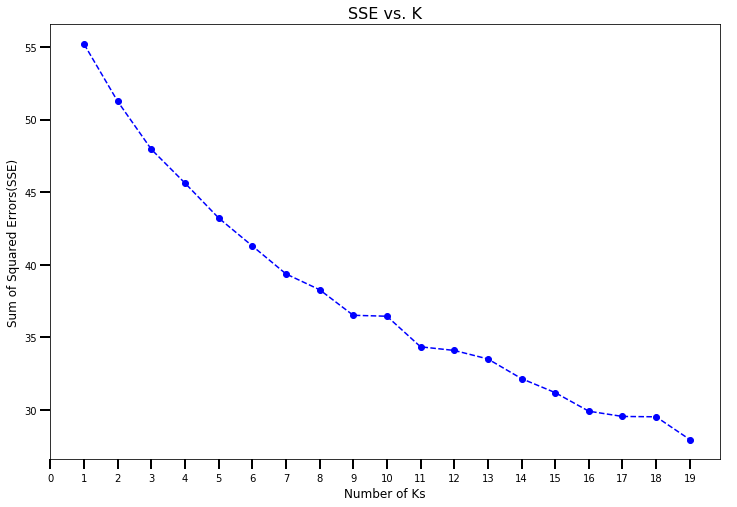

In [35]:
scores = []
#testing for cluster counts through 20 clusters
ks=20
k_values = list(range(1,ks))

for k in k_values:
    scores.append(kmeans_score(zurich_grouped_clustering , k))

plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.plot(k_values, scores, linestyle='--', marker='o', color='b');
ax.xaxis.set_tick_params(width=2, length=10)
ax.yaxis.set_tick_params(width=2, length=10)
plt.xlabel('Number of Ks',fontsize=12)
plt.ylabel('Sum of Squared Errors(SSE)',fontsize=12)
plt.xticks(np.arange(0, ks, 1))
plt.title('SSE vs. K',fontsize=16)
plt.show()

## Selecting k
> Using the elbow method to determine the optimal number of clusters for k-means clustering, it can be noticed from the plot, that the errors (SSE) continue falling with increasing number of clusters. However, since the goal of clustering is to identify segments to be used for directing marketing campaigns towards audiences that will have the highest expeted rate of returns, creating a high number of clusters might not be so beneficial and doesn't make much sense if the marketing campaigns will only be directed to some specific clusters and the others might just be discarded, meaning that after some point each additional cluster provides even a smaller net benefit. Considering that, and based on the SSE vs. k curve besides the practical application of the created cluster, I would suggest a k = 9 to be a proper value that satisfies the two conditions of not being to large to make marketing results analysis and application too complex, and also showing a significant reduction in error (SSE). 

In [36]:
# set number of clusters
kclusters = 9
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(zurich_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 4, 3, 8, 3, 0, 3, 1, 3])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [37]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

zurich_data.rename(index=str, columns={'Place':'Neighborhood'},inplace=True)

zurich_merged = zurich_data

# merge zurich_grouped with toronto_data to add latitude/longitude for each neighborhood
zurich_merged = zurich_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

zurich_merged.head() # check the last columns!

,Postalcode,Kanton,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,8001,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55,3.0,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant
1,8002,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55,3.0,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant
2,8003,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55,3.0,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant
3,8004,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55,3.0,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant
4,8005,Kanton Zürich,Bezirk Zürich,Zürich,47.367,8.55,3.0,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant


In [38]:
print(zurich_merged.shape)
zurich_merged.dropna(inplace=True)
zurich_merged.isnull().sum()

(200, 17)


Postalcode                0
Kanton                    0
Borough                   0
Neighborhood              0
Latitude                  0
Longitude                 0
Cluster Labels            0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

In [39]:
zurich_merged['Cluster Labels'] = zurich_merged['Cluster Labels'].astype('int64')
zurich_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 0 to 199
Data columns (total 17 columns):
Postalcode                189 non-null object
Kanton                    189 non-null object
Borough                   189 non-null object
Neighborhood              189 non-null object
Latitude                  189 non-null float64
Longitude                 189 non-null float64
Cluster Labels            189 non-null int64
1st Most Common Venue     189 non-null object
2nd Most Common Venue     189 non-null object
3rd Most Common Venue     189 non-null object
4th Most Common Venue     189 non-null object
5th Most Common Venue     189 non-null object
6th Most Common Venue     189 non-null object
7th Most Common Venue     189 non-null object
8th Most Common Venue     189 non-null object
9th Most Common Venue     189 non-null object
10th Most Common Venue    189 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 26.6+ KB


<a id='results'></a>
# Results

Finally, let's visualize the resulting clusters

In [40]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(zurich_merged['Latitude'], zurich_merged['Longitude'], zurich_merged['Neighborhood'], zurich_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    #print(cluster+1,color)
       
map_clusters

### Examine Clusters

Now,we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then select the most interesting clusters. 

#### Cluster 1

In [41]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 0, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Kanton Zürich,8.668,0,Restaurant,Italian Restaurant,Zoo Exhibit,Event Service,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
92,Kanton Zürich,8.606,0,Flower Shop,Wine Bar,Athletics & Sports,Restaurant,Event Service,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm
102,Kanton Zürich,8.768,0,Supermarket,IT Services,Restaurant,Zoo Exhibit,Event Service,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm
137,Kanton Zürich,8.600,0,Plaza,Yoga Studio,Swiss Restaurant,Restaurant,Electronics Store,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
138,Kanton Zürich,8.436,0,Restaurant,Swiss Restaurant,Zoo Exhibit,Event Service,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
165,Kanton Zürich,8.807,0,Restaurant,Zoo Exhibit,Event Service,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Factory
166,Kanton Zürich,8.775,0,Restaurant,Event Space,Zoo Exhibit,Event Service,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
170,Kanton Zürich,8.618,0,Restaurant,Business Service,Zoo Exhibit,Event Space,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
171,Kanton Zürich,8.594,0,Restaurant,Shopping Mall,Business Service,Zoo Exhibit,Event Service,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
174,Kanton Zürich,8.670,0,Racetrack,Restaurant,Zoo Exhibit,Electronics Store,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Factory


#### Cluster 2

In [42]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 1, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,Kanton Zürich,8.391,1,Brewery,Swiss Restaurant,Grocery Store,Zoo Exhibit,Event Space,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm
61,Kanton Zürich,8.627,1,Flower Shop,Swiss Restaurant,Zoo Exhibit,Event Space,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
68,Kanton Zürich,8.576,1,Swiss Restaurant,Pool,Grocery Store,Bus Station,Zoo Exhibit,Event Space,Field,Fast Food Restaurant,Farmers Market,Farm
71,Kanton Zürich,8.452,1,Swiss Restaurant,Zoo Exhibit,Event Space,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
75,Kanton Zürich,8.554,1,Swiss Restaurant,Flower Shop,American Restaurant,Gastropub,Zoo Exhibit,Factory,Flea Market,Field,Fast Food Restaurant,Farmers Market
76,Kanton Zürich,8.502,1,Swiss Restaurant,Convenience Store,Flea Market,Bus Station,Gastropub,Food,Field,Fast Food Restaurant,Farmers Market,Farm
91,Kanton Zürich,8.665,1,Convenience Store,Swiss Restaurant,Event Space,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
151,Kanton Zürich,8.499,1,Flower Shop,Swiss Restaurant,Grocery Store,Event Service,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
152,Kanton Zürich,8.439,1,Swiss Restaurant,Zoo Exhibit,Event Space,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
160,Kanton Zürich,8.508,1,Swiss Restaurant,Garden,Zoo Exhibit,Event Space,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


#### Cluster 3

In [43]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 2, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
96,Kanton Zürich,8.705,2,Bakery,Zoo Exhibit,Food & Drink Shop,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
191,Kanton Zürich,8.929,2,Bakery,Zoo Exhibit,Food & Drink Shop,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


#### Cluster 4

In [44]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 3, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kanton Zürich,8.550,3,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant
1,Kanton Zürich,8.550,3,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant
2,Kanton Zürich,8.550,3,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant
3,Kanton Zürich,8.550,3,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant
4,Kanton Zürich,8.550,3,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant
5,Kanton Zürich,8.550,3,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant
6,Kanton Zürich,8.550,3,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant
7,Kanton Zürich,8.550,3,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant
8,Kanton Zürich,8.550,3,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant
9,Kanton Zürich,8.550,3,Hotel,Swiss Restaurant,Italian Restaurant,Bar,Café,Lounge,Coffee Shop,Plaza,Bakery,French Restaurant


### Cluster 5

In [45]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 4, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
114,Kanton Zürich,8.75,4,Mountain,Cosmetics Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
196,Kanton Zürich,8.49,4,Mountain,Cosmetics Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


### Cluster 6

In [46]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 5, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
135,Kanton Zürich,8.427,5,Shop & Service,Bus Station,Zoo Exhibit,Food,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
143,Kanton Zürich,8.637,5,Bus Station,Zoo Exhibit,Cosmetics Shop,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
158,Kanton Zürich,8.433,5,Bus Station,Zoo Exhibit,Cosmetics Shop,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
161,Kanton Zürich,8.635,5,Bus Station,Zoo Exhibit,Cosmetics Shop,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
190,Kanton Zürich,8.783,5,Bus Station,Zoo Exhibit,Cosmetics Shop,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


### Cluster 7

In [47]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 6, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
154,Kanton Zürich,8.407,6,Train Station,Zoo Exhibit,Event Service,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
180,Kanton Zürich,8.728,6,Train Station,Zoo Exhibit,Event Service,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


### Cluster 8

In [48]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 7, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
66,Kanton Zürich,8.643,7,Light Rail Station,Scenic Lookout,Train Station,Italian Restaurant,Zoo Exhibit,Event Service,Field,Fast Food Restaurant,Farmers Market,Farm
144,Kanton Zürich,8.683,7,Science Museum,Light Rail Station,Italian Restaurant,Zoo Exhibit,Event Space,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm
145,Kanton Zürich,8.683,7,Science Museum,Light Rail Station,Italian Restaurant,Zoo Exhibit,Event Space,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm
150,Kanton Zürich,8.490,7,Italian Restaurant,Zoo Exhibit,Event Space,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


### Cluster 9

In [49]:
zurich_merged.loc[zurich_merged['Cluster Labels'] == 8, zurich_merged.columns[[1] + list(range(5, zurich_merged.shape[1]))]]

,Kanton,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Kanton Zürich,8.530,8,Pizza Place,Convenience Store,Airport Terminal,Train Station,Event Service,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm
31,Kanton Zürich,8.751,8,Food & Drink Shop,Convenience Store,Art Gallery,Bakery,Train Station,Factory,Flower Shop,Flea Market,Field,Fast Food Restaurant
39,Kanton Zürich,8.657,8,Train Station,Café,Italian Restaurant,Food & Drink Shop,Diner,Discount Store,Flower Shop,Flea Market,Field,Fast Food Restaurant
48,Kanton Zürich,8.697,8,Print Shop,Grocery Store,Train Station,Cheese Shop,Dessert Shop,Event Service,Field,Fast Food Restaurant,Farmers Market,Farm
72,Kanton Zürich,8.377,8,Café,Train Station,Gourmet Shop,Soccer Field,Dessert Shop,Diner,Flea Market,Field,Fast Food Restaurant,Farmers Market
78,Kanton Zürich,8.543,8,Flower Shop,Miscellaneous Shop,Train Station,Restaurant,Event Service,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm
79,Kanton Zürich,8.644,8,River,Hardware Store,Pier,Train Station,Electronics Store,Field,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
80,Kanton Zürich,8.630,8,Food & Drink Shop,Food Truck,Mexican Restaurant,Train Station,Event Space,Flea Market,Field,Fast Food Restaurant,Farmers Market,Farm
82,Kanton Zürich,8.721,8,Playground,Grocery Store,Swiss Restaurant,Train Station,Café,Pizza Place,Dessert Shop,Event Service,Fast Food Restaurant,Farmers Market
89,Kanton Zürich,8.865,8,Print Shop,Train Station,Furniture / Home Store,Convenience Store,Health & Beauty Service,Flea Market,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


<a id='discussion'></a>
## Discussion

>Keeping in mind that the main business application consists in opening a new restaurant supply shop and that the target market for this kind of business includes: restaurants, culinary schools, cafeterias(including medical and schools), bars, caterers, bakeries and coffee shops. Based on the clustering results, cluster 1 and mainly cluster 4 are the ones grouping a high proportion of venues which are part of the target market. This is valuable information that will help decision makers choosing the right place for opening the shop, planning logistics, calculating costs and designing better marketing campaigns.     


<a id='conclusion'></a>
## Conclusion

>Combining location data with unsupervised learning techniques, it was possible to segment places in the city of Zürich and create clusters that agglomerate venues considered the target audience for the proposed business case, namely restaurants, hotels, bars, coffe shops, bistros, hotels on others related to the culinary community.
>For this specific project, clusters 1 and 4 are the most relevant ones to further analyze and consider when making business decisions. 

<a id='reference'></a>
# References
* [Geo_Data_Switzerland](http://www.ralphstraumann.ch/blog/2011/10/zipscribble-map-switzerland-part-i/)
* [geonames_postalcodes_CH](https://www.geonames.org/postal-codes/CH/ZH/zurich.html)
* [BeautifulSoup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
* [Web Scraping Wikipedia Tables using BeautifulSoup and Python](https://medium.com/analytics-vidhya/web-scraping-wiki-tables-using-beautifulsoup-and-python-6b9ea26d8722)
* [Foursquare](https://foursquare.com/)
* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
* [IBM_Coursera_Data Science Certificate](https://www.coursera.org/specializations/ibm-data-science-professional-certificate)